In [ ]:
# contamination = 0.03

In [ ]:
# X = features_df[feature_cols].values
# clf = IsolationForest(n_jobs=-1, contamination=contamination)
# clf.fit(X)
# scores = clf.predict(X)
# decisions = clf.decision_function(X)
# show_galaxies(features_df.iloc[np.argsort(decisions)])
# raw, doens't work great

In [ ]:
from sklearn.decomposition import IncrementalPCA

Text(0, 0.5, 'Explained Variance')

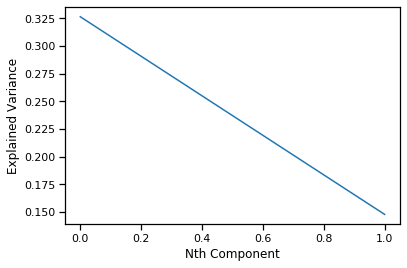

In [ ]:


n_components = 2
pca = IncrementalPCA(n_components=n_components)
reduced_embed = pca.fit_transform(features_df[feature_cols].values)  # 30k

plt.plot(range(n_components), pca.explained_variance_ratio_)
plt.xlabel('Nth Component')
plt.ylabel('Explained Variance')

In [ ]:

# plt.plot(range(n_components), np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Nth Component')
# plt.ylabel('Total Explained Variance')

In [ ]:
# X_pca = pca.transform(X)
# fails for large data

In [ ]:

# clf = IsolationForest(n_jobs=-1,  contamination=contamination)
# clf.fit(X_pca)
# scores = clf.predict(X_pca)
# decisions = clf.decision_function(X_pca)

In [ ]:
# pd.value_counts(scores)

In [ ]:
# show_galaxies(features_df.iloc[np.argsort(decisions)])

In [ ]:
# features_df = features_df.sample(60000)

In [ ]:

reducer_10 = umap.UMAP(n_components=2, min_dist=.0, n_neighbors=5)
X_10 = reducer_10.fit_transform(features_df[feature_cols].values)

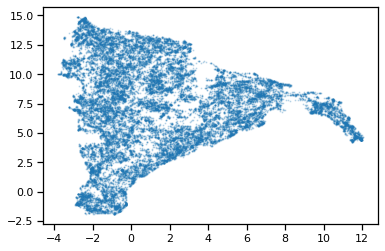

In [ ]:
plt.scatter(X_10[:, 0], X_10[:, 1], s=1., alpha=.2)

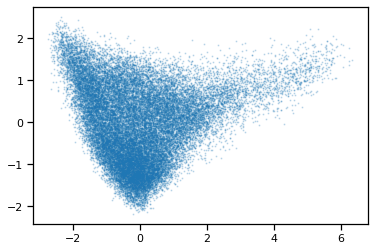

In [ ]:
plt.scatter(reduced_embed[:, 0], reduced_embed[:, 1], s=1., alpha=.2)

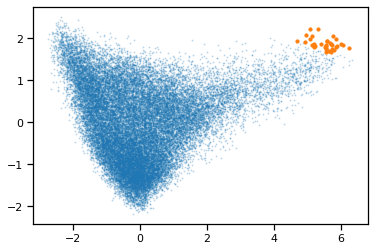

In [ ]:
clf = IsolationForest(n_jobs=-1, contamination=contamination)
clf.fit(reduced_embed)
scores = clf.predict(reduced_embed)
decisions = clf.decision_function(reduced_embed)
# umap tends to find galaxies which are morphologically extreme - super smooth, super featured, or missing
#     pd.value_counts(scores)
anomaly_indices = np.argsort(decisions)[:36]

plt.scatter(reduced_embed[:, 0], reduced_embed[:, 1], s=1., alpha=.2)
plt.scatter(reduced_embed[anomaly_indices, 0], reduced_embed[anomaly_indices, 1], s=10.)

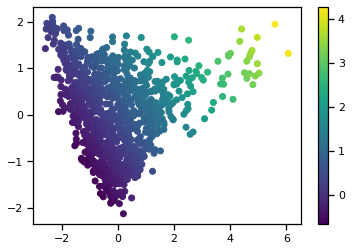

(array([1331., 5821., 9406., 7595., 3238., 1296.,  601.,  362.,  277.,
          73.]),
 array([-2.75379186, -1.84455857, -0.93532528, -0.02609198,  0.88314131,
         1.79237461,  2.7016079 ,  3.6108412 ,  4.52007449,  5.42930778,
         6.33854108]),
 <a list of 10 Patch objects>)

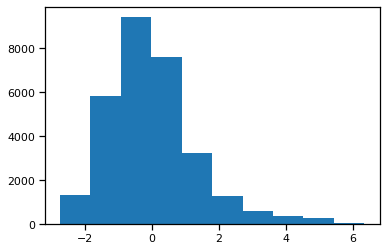

0.9212613914448308

In [ ]:
blank_examples = list(features_df.iloc[np.argsort(decisions)][:200].index)
# blank_examples

In [ ]:
blank_vols = vols[vols['iauname'].isin(blank_examples)]
len(blank_vols)

200

In [ ]:
good_vols = vols[vols['iauname'].isin(good_galaxies)]

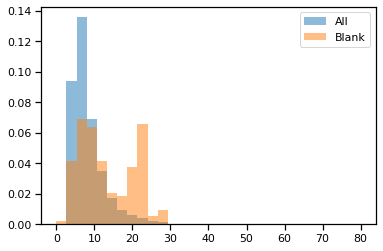

In [ ]:
fig, ax = plt.subplots()
alpha = .5
_, bins = np.histogram(np.linspace(0., 80.), 30)
ax.hist(good_vols['petro_th90'], label='All', alpha=alpha, density=True, bins=bins)
ax.hist(blank_vols['petro_th90'], label='Blank', alpha=alpha, density=True, bins=bins)
ax.legend()

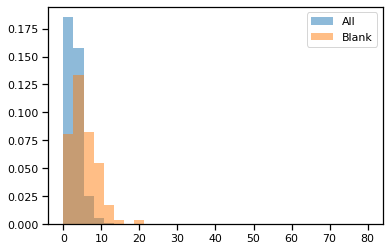

In [ ]:
fig, ax = plt.subplots()
alpha = .5
ax.hist(good_vols['petro_th50'], label='All', alpha=alpha, density=True, bins=bins)
ax.hist(blank_vols['petro_th50'], label='Blank', alpha=alpha, density=True, bins=bins)
ax.legend()

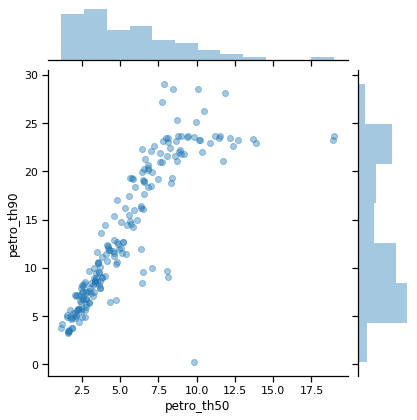

In [ ]:
sns.jointplot(blank_vols['petro_th50'], blank_vols['petro_th90'], alpha=.4)

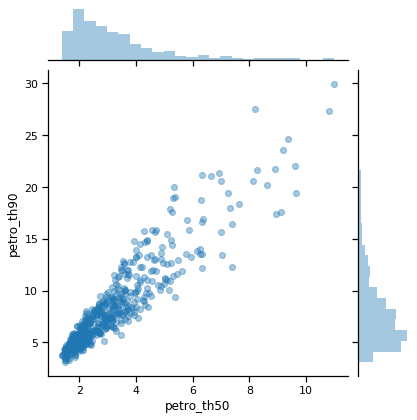

In [ ]:
some_vols = good_vols.sample(500)
sns.jointplot(some_vols['petro_th50'], some_vols['petro_th90'], alpha=.4)

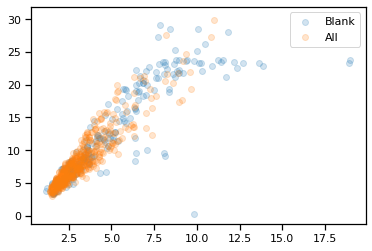

In [ ]:
plt.scatter(blank_vols['petro_th50'], blank_vols['petro_th90'], alpha=.2, label='Blank')
plt.scatter(some_vols['petro_th50'], some_vols['petro_th90'], alpha=.2, label='All')
plt.legend()

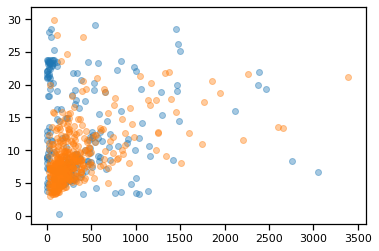

In [ ]:
plt.scatter(blank_vols['sersic_nmgy_r'], blank_vols['petro_th90'], alpha=.4)
plt.scatter(some_vols['sersic_nmgy_r'], some_vols['petro_th90'], alpha=.4)

th50 < 20, th90 < 30 seems like the next sensible cut

In [ ]:

cuts = np.linspace(100, 10000)
blank_frac = []
vol_frac = []
for cut in cuts:
    blank_frac.append((blank_vols['sersic_nmgy_r'] > cut).mean())
    vol_frac.append((vols['sersic_nmgy_r'] > cut).mean())

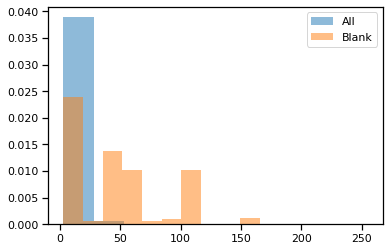

In [ ]:
fig, ax = plt.subplots()
alpha = .5
ax.hist(vols['petro_theta'], label='All', alpha=alpha, density=True)
ax.hist(blank_vols['petro_theta'], label='Blank', alpha=alpha, density=True)
ax.legend()

In [ ]:
# fig, ax = plt.subplots()
# alpha = .5
# ax.hist(some_vols['elpetro_absmag_r'], label='All', alpha=alpha, density=True)
# ax.hist(blank_vols['elpetro_absmag_r'], label='Blank', alpha=alpha, density=True)
# ax.legend()

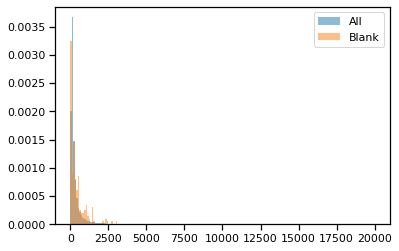

In [ ]:
fig, ax = plt.subplots()
alpha = .5
_, bins = np.histogram(np.linspace(0., 20000), 200)
ax.hist(vols['sersic_nmgy_r'], label='All', alpha=alpha, density=True, bins=bins)
ax.hist(blank_vols['sersic_nmgy_r'], label='Blank', alpha=alpha, density=True, bins=bins)
ax.legend()

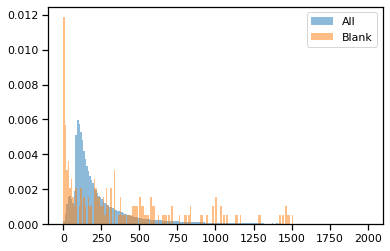

In [ ]:
fig, ax = plt.subplots()
alpha = .5
_, bins = np.histogram(np.linspace(0., 2000), 200)
ax.hist(vols['sersic_nmgy_r'], label='All', alpha=alpha, density=True, bins=bins)
ax.hist(blank_vols['sersic_nmgy_r'], label='Blank', alpha=alpha, density=True, bins=bins)
ax.legend()

In [ ]:

cuts = np.linspace(100, 10000)
blank_frac = []
vol_frac = []
for cut in cuts:
    blank_frac.append((blank_vols['sersic_nmgy_r'] > cut).mean())
    vol_frac.append((vols['sersic_nmgy_r'] > cut).mean())

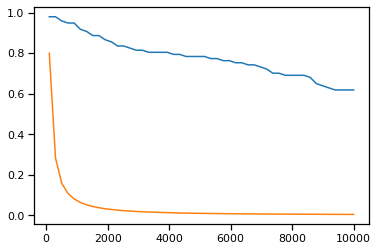

In [ ]:
plt.plot(cuts, blank_frac)
plt.plot(cuts, vol_frac)

So a cut of ~3500 or so should remove 80% of the blanks and almost none of the main sample

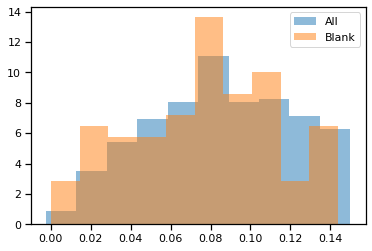

In [ ]:
fig, ax = plt.subplots()
alpha = .5

ax.hist(vols['redshift'], label='All', alpha=alpha, density=True)
ax.hist(blank_vols['redshift'], label='Blank', alpha=alpha, density=True)
ax.legend()

In [ ]:
vols.columns.values

array(['iauname', 'ra', 'dec', 'redshift', 'elpetro_absmag_r',
       'sersic_nmgy_r', 'petro_th50', 'petro_th90', 'petro_theta',
       'upload_group', 'active_learning_on', 'in_gzd_ab', 'png_loc',
       'smooth-or-featured_total-votes', 'smooth-or-featured_smooth',
       'smooth-or-featured_smooth_fraction',
       'smooth-or-featured_featured-or-disk',
       'smooth-or-featured_featured-or-disk_fraction',
       'smooth-or-featured_artifact',
       'smooth-or-featured_artifact_fraction', 'disk-edge-on_total-votes',
       'disk-edge-on_yes', 'disk-edge-on_yes_fraction', 'disk-edge-on_no',
       'disk-edge-on_no_fraction', 'has-spiral-arms_total-votes',
       'has-spiral-arms_yes', 'has-spiral-arms_yes_fraction',
       'has-spiral-arms_no', 'has-spiral-arms_no_fraction',
       'bar_total-votes', 'bar_strong', 'bar_strong_fraction', 'bar_weak',
       'bar_weak_fraction', 'bar_no', 'bar_no_fraction',
       'bulge-size_total-votes', 'bulge-size_dominant',
       'bulge-size_do

In [ ]:
from sklearn import preprocessing

In [ ]:
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)

In [ ]:
X_10_trans = quantile_transformer.fit_transform(X_10)

(array([  814.,  2206.,  4161.,  7786., 11628.,  9207.,  6418.,  6456.,
         8809.,  2515.]),
 array([2.2333853, 2.9804828, 3.7275803, 4.4746776, 5.221775 , 5.9688725,
        6.71597  , 7.4630675, 8.210165 , 8.957263 , 9.70436  ],
       dtype=float32),
 <a list of 10 Patch objects>)

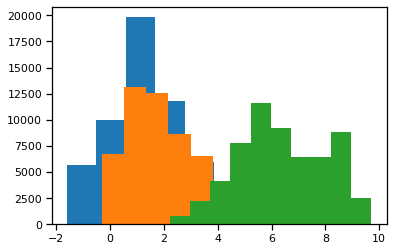

In [ ]:
plt.hist(X_10[:, 0])
plt.hist(X_10[:, 1])
plt.hist(X_10[:, 2])

(array([6002., 5995., 6004., 6006., 5989., 6005., 6000., 6004., 5993.,
        6002.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

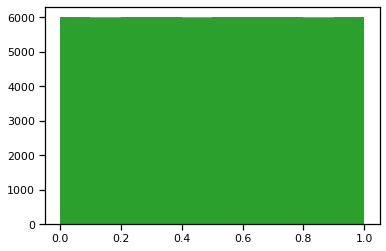

In [ ]:
plt.hist(X_10_trans[:, 0])
plt.hist(X_10_trans[:, 1])
plt.hist(X_10_trans[:, 2])